In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# data cleaning
# EDA
# text preprocesing
# model building
# Evaluation
#improvement
# website
# deploy

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4898,ham,"Haha, that was the first person I was gonna ask"
3236,ham,Ron say fri leh. N he said ding tai feng cant ...
241,ham,PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx
342,ham,Where u been hiding stranger?
3023,ham,I love ya too but try and budget your money be...


In [10]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
# ham and spam are replaced with numbers using label encoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
import matplotlib.pyplot as plt

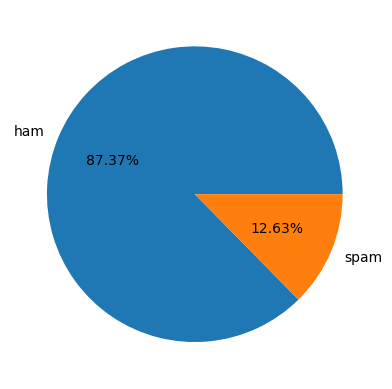

In [21]:
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f%%')
plt.show()         

#data is Imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_char']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,target,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [31]:
df[df['target']==0][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

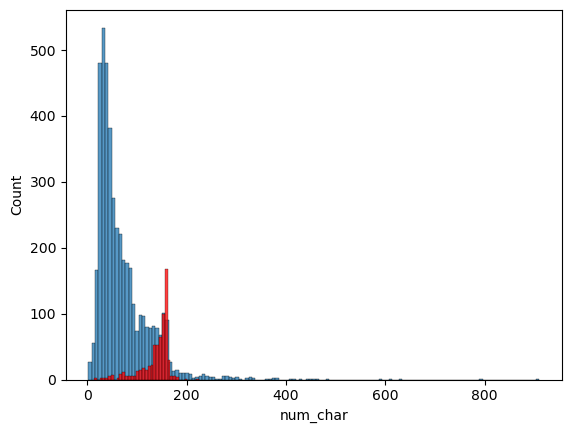

In [34]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

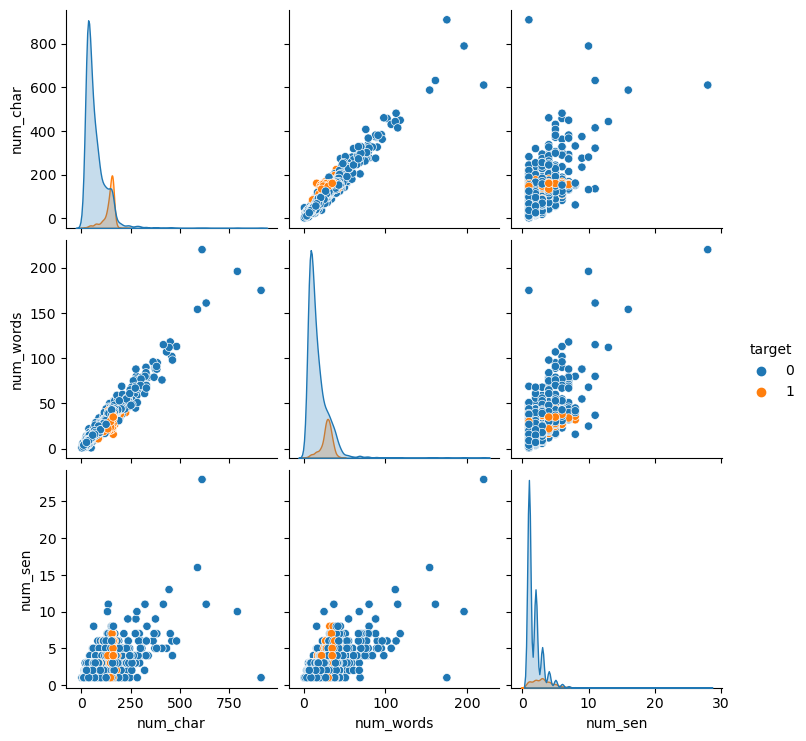

In [35]:
sns.pairplot(df,hue='target')

C:\Users\nitis\AppData\Local\Temp\ipykernel_15952\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

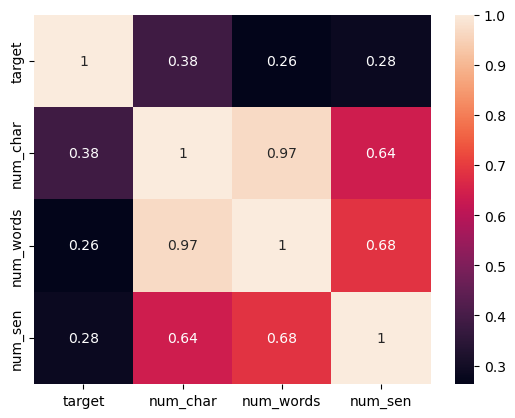

In [36]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing
* lower casing
* Tokenization
* removing spl char
* Removing stopwords
* stemming/lemmatization

In [52]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [53]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [56]:
df['transformed_text']=df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Wordcloud for ham and spam

In [66]:
!pip install wordcloud

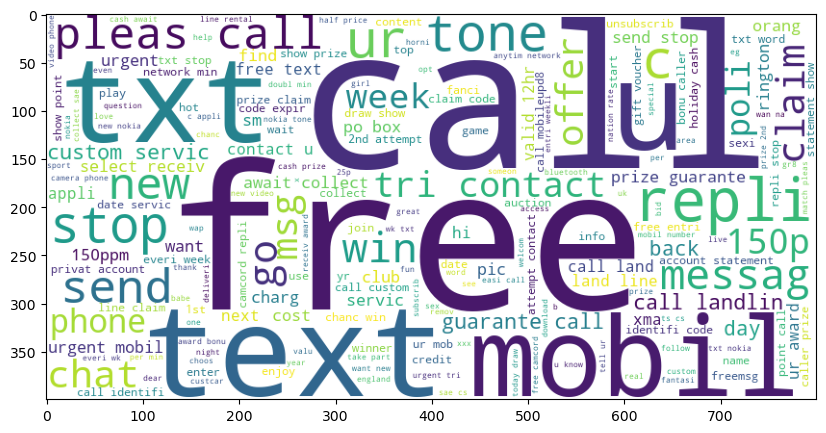

In [74]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white')

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)

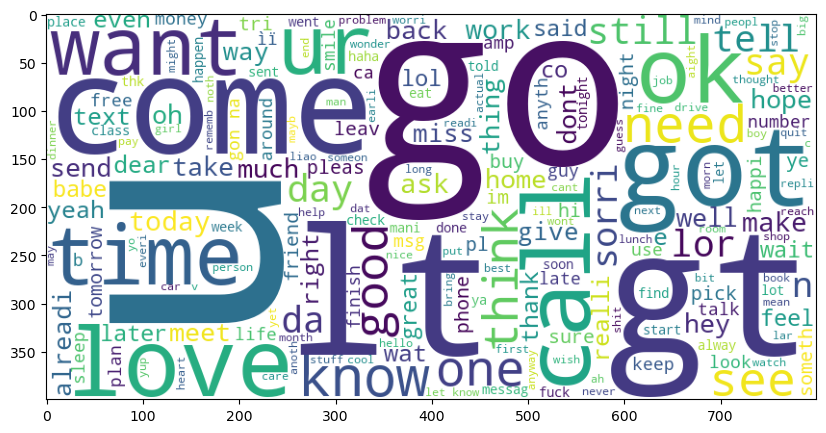

In [75]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc)

## Top 30 words in ham and spam

In [82]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [83]:
len(spam_corpus)

9939

In [107]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [108]:
df1

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


## Text Vectorize

In [136]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [137]:
x=cv.fit_transform(df['transformed_text']).toarray()
m=tf.fit_transform(df['transformed_text']).toarray()

In [118]:
x.shape

(5169, 6708)

In [122]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
y=df['target'].values

In [121]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Model Building
## CountVectorizer

In [120]:
from sklearn.model_selection import train_test_split

In [126]:
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB

In [133]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming you have Xtrain, ytrain, Xtest, ytest as your training and testing data

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
y_pred_gnb = gnb.predict(Xtest)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
y_pred_mnb = mnb.predict(Xtest)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(Xtrain, ytrain)
y_pred_bnb = bnb.predict(Xtest)

# Print metrics for each classifier
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_gnb))
print("Precision Score:", precision_score(ytest, y_pred_gnb))

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_mnb))
print("Precision Score:", precision_score(ytest, y_pred_mnb))

print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_bnb))
print("Precision Score:", precision_score(ytest, y_pred_bnb))


Gaussian Naive Bayes:
Accuracy: 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision Score: 0.5315315315315315

Multinomial Naive Bayes:
Accuracy: 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision Score: 0.8344370860927153

Bernoulli Naive Bayes:
Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


In [ ]:
## Text Vectorize= TF-IDF method

In [138]:
Xtrain,Xtest,ytrain,ytest=train_test_split(m,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [139]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming you have Xtrain, ytrain, Xtest, ytest as your training and testing data

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
y_pred_gnb = gnb.predict(Xtest)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
y_pred_mnb = mnb.predict(Xtest)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(Xtrain, ytrain)
y_pred_bnb = bnb.predict(Xtest)

# Print metrics for each classifier
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_gnb))
print("Precision Score:", precision_score(ytest, y_pred_gnb))

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_mnb))
print("Precision Score:", precision_score(ytest, y_pred_mnb))

print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(ytest, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_bnb))
print("Precision Score:", precision_score(ytest, y_pred_bnb))


Gaussian Naive Bayes:
Accuracy: 0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision Score: 0.5231481481481481

Multinomial Naive Bayes:
Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision Score: 1.0

Bernoulli Naive Bayes:
Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


## Best model

Multinomial Naive Bayes:
Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision Score: 1.0

## Model improvements
* TF-idf parameters (max_features=3000)
* Scaling the independent features


In [140]:
import pickle 
pickle.dump(tf.to_dict(),open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))